# Feature selection with Correlation Matrix

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('music_genre_dataset.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,273573,4,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,277667,3,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,226933,4,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,223948,4,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,139693,4,acoustic


### Some features seem to be  more uncorrelated with the dataset comparing the other ones. These can be shown as key, mode, liveness, duration_ms. We can get rid of some of these features to reduce complexity and get a better result with a model. Key seems to be the most uncorrelated one among all of them. However, I believe that key is very important to construct a song therefore we are gonna use all of the features except we got rid of previously such as uri, link, etc

In [3]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,0.277669,0.029373,0.389346,-0.073449,0.105969,-0.335765,-0.200610,-0.065072,0.494665,-0.059718,-0.071185,0.201062
energy,0.277669,1.000000,0.032465,0.830976,-0.072364,0.194268,-0.829019,-0.431429,0.193508,0.447930,0.279120,-0.063546,0.222907
key,0.029373,0.032465,1.000000,0.021856,-0.117095,0.019516,-0.024683,0.009868,0.002486,0.027677,-0.000828,0.020109,0.005573
loudness,0.389346,0.830976,0.021856,1.000000,-0.017899,0.125826,-0.733540,-0.626945,0.142140,0.431540,0.248310,-0.105506,0.208010
mode,-0.073449,-0.072364,-0.117095,-0.017899,1.000000,-0.100551,0.074109,-0.091410,-0.016801,-0.007563,0.008881,-0.067257,-0.012357
speechiness,0.105969,0.194268,0.019516,0.125826,-0.100551,1.000000,-0.145956,-0.086806,0.120006,0.057074,0.118739,-0.038162,0.027636
acousticness,-0.335765,-0.829019,-0.024683,-0.733540,0.074109,-0.145956,1.000000,0.395593,-0.125906,-0.345431,-0.247636,-0.010504,-0.211186
instrumentalness,-0.200610,-0.431429,0.009868,-0.626945,-0.091410,-0.086806,0.395593,1.000000,-0.115850,-0.346888,-0.129696,0.227508,-0.126346
liveness,-0.065072,0.193508,0.002486,0.142140,-0.016801,0.120006,-0.125906,-0.115850,1.000000,0.060969,0.058020,0.048804,0.031553
valence,0.494665,0.447930,0.027677,0.431540,-0.007563,0.057074,-0.345431,-0.346888,0.060969,1.000000,0.100806,-0.187942,0.184904


In [4]:
df = df.drop("key",axis=1)
df = df.drop("mode",axis=1)
df = df.drop("liveness",axis=1)
df = df.drop("duration_ms",axis=1)

<AxesSubplot:>

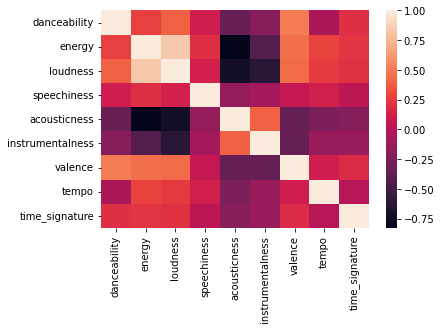

In [5]:
sns.heatmap(df.corr())

array([[<AxesSubplot:xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot:xlabel='energy', ylabel='danceability'>,
        <AxesSubplot:xlabel='loudness', ylabel='danceability'>,
        <AxesSubplot:xlabel='speechiness', ylabel='danceability'>,
        <AxesSubplot:xlabel='acousticness', ylabel='danceability'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='danceability'>,
        <AxesSubplot:xlabel='valence', ylabel='danceability'>,
        <AxesSubplot:xlabel='tempo', ylabel='danceability'>,
        <AxesSubplot:xlabel='time_signature', ylabel='danceability'>],
       [<AxesSubplot:xlabel='danceability', ylabel='energy'>,
        <AxesSubplot:xlabel='energy', ylabel='energy'>,
        <AxesSubplot:xlabel='loudness', ylabel='energy'>,
        <AxesSubplot:xlabel='speechiness', ylabel='energy'>,
        <AxesSubplot:xlabel='acousticness', ylabel='energy'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='energy'>,
        <AxesSubplot:xlabel='valence', 

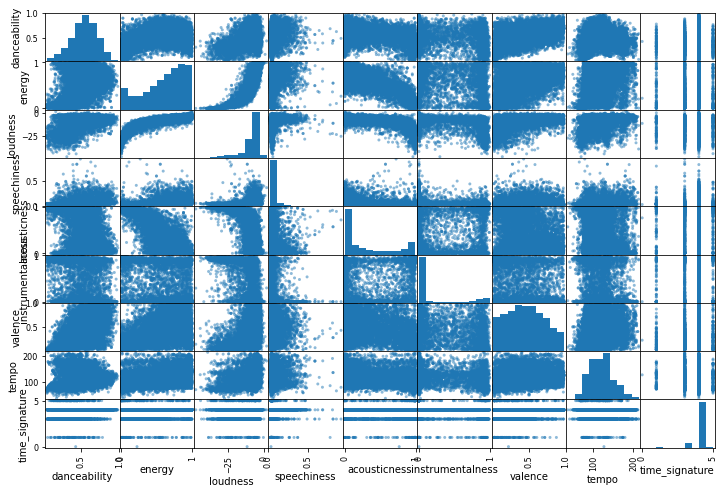

In [6]:
from pandas.plotting import scatter_matrix
attributes = ['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'tempo',
    'time_signature', 'genre']
scatter_matrix(df,figsize=(12,8))

In [7]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'tempo', 'time_signature', 'genre'],
      dtype='object')

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
print(df['genre'].unique())

[0 1 2 3 4 5 6 7 8 9]


### The split of the dataset is done via stratifying

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('genre',axis=1)
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [{
    'n_estimators': [50, 100, 200, 500],
    'max_features': [None, "sqrt", "log2"],
    'max_depth': [None, 1, 5, 10, 20]
}]
forest_class = RandomForestClassifier()
grid_search = GridSearchCV(forest_class, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 1, 5, 10, 20],
                          'max_features': [None, 'sqrt', 'log2'],
                          'n_estimators': [50, 100, 200, 500]}])

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
final_model = grid_search.best_estimator_
print("Estimator: "+str(final_model))
final_predictions = final_model.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test, final_predictions)))

Estimator: RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=500)
Accuracy: 0.47


In [12]:
# Now the features are not going to be dSropped
df = pd.read_csv('music_genre_dataset.csv')
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
X = df.drop('genre',axis=1)
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)
param_grid = [{
    'n_estimators': [50, 100, 200, 500],
    'max_features': [None, "sqrt", "log2"],
    'max_depth': [None, 1, 5, 10, 20]
}]
forest_class = RandomForestClassifier()
grid_search = GridSearchCV(forest_class, param_grid)
grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_
print("Estimator: "+str(final_model))
final_predictions = final_model.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test, final_predictions)))

Estimator: RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200)
Accuracy: 0.48125


### At the end, 2 dataset with different attributes have been processed. The former is with some features dropped and the latter is with the more features. As expected, Model with more features give better result, but all features are not used according to estimator.